In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [4]:
rho=sp.Function("rho")
p=sp.Function("p")
rho_0=sp.symbols("rho_0")
r=sp.symbols("r")
k=sp.symbols("k")
L=sp.symbols("L")
R=sp.symbols("R")

In [6]:
Eq=sp.Eq(rho(r),rho_0*(1-(r/L)**2))
Eq

Eq(rho(r), rho_0*(1 - r**2/L**2))

In [8]:
Eq=Eq.subs([(rho_0,450),(L,16)])
Eq

Eq(rho(r), 450 - 225*r**2/128)

In [10]:
Eq_1=sp.Eq(p(r),1/3 * (rho(r)-k))
Eq_1

Eq(p(r), -0.333333333333333*k + 0.333333333333333*rho(r))

In [12]:
Eq_2=Eq_1.subs(k,225)
Eq_2

Eq(p(r), 0.333333333333333*rho(r) - 75.0)

In [14]:
sol_1=sp.solve(Eq_2,rho(r))[0]
print("𝜌(𝑟)=",sol_1)

𝜌(𝑟)= 3.0*p(r) + 225.0


In [16]:
Eq_3=sp.Eq(Eq.rhs,sol_1)
Eq_3

Eq(450 - 225*r**2/128, 3.0*p(r) + 225.0)

In [18]:
Eq_4=Eq_3.subs(p(r),0)
Eq_4

Eq(450 - 225*r**2/128, 225.0)

In [20]:
sol_2=sp.solve(Eq_4,r)[1]
print("The radius at which pressure becomes zero is",sol_2,"km")

The radius at which pressure becomes zero is 11.3137084989848 km


In [22]:
Eq_5=Eq.subs(r,11.3137084989848)
Eq_5

Eq(rho(11.3137084989848), 224.999999999998)

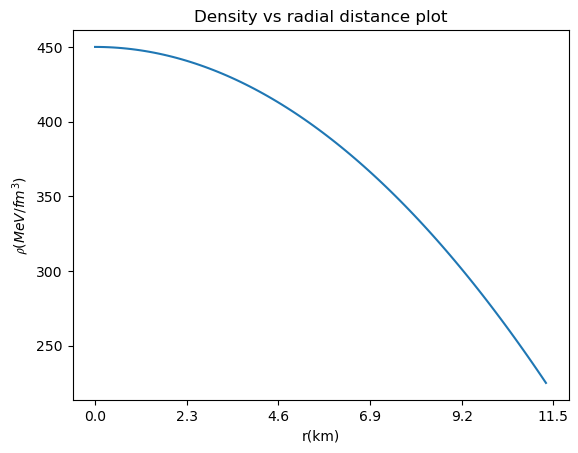

In [24]:
func=sp.lambdify(r,Eq.rhs,"numpy")
rvals=np.linspace(0,11.3137084989848,100)
density_vals=func(rvals)
plt.xlabel("r(km)")
plt.ylabel("$𝜌(MeV/fm^3)$")
plt.xticks([0,2.3,4.6,6.9,9.2,11.5])
plt.plot(rvals,density_vals)
plt.title("Density vs radial distance plot")
plt.show()

In [26]:
sol_4=sp.solve(Eq_3,p(r))[0]
sol_4

75.0 - 0.5859375*r**2

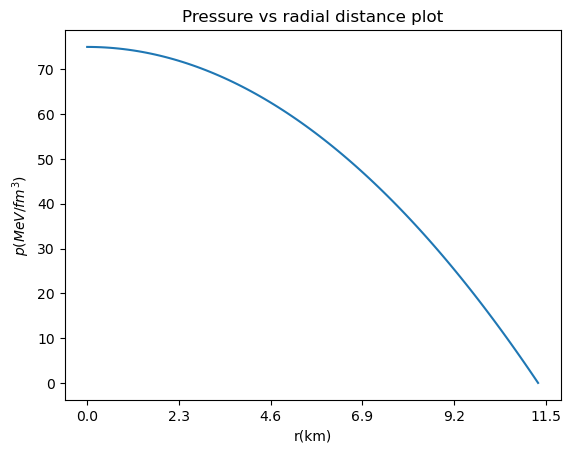

In [30]:
func_1=sp.lambdify(r,sol_4,"numpy")
rvals=np.linspace(0,11.3137084989848,100)
pressure_vals=func_1(rvals)
plt.xlabel("r(km)")
plt.ylabel("$p(MeV/fm^3)$")
plt.xticks([0,2.3,4.6,6.9,9.2,11.5])
plt.plot(rvals,pressure_vals)
plt.title("Pressure vs radial distance plot")
plt.show()

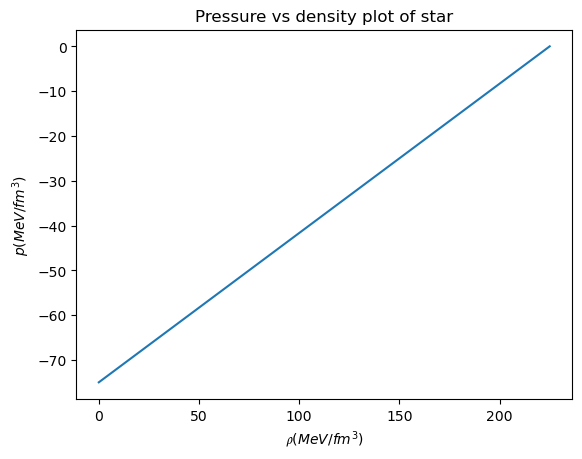

In [32]:
func_2=sp.lambdify(rho(r),Eq_2.rhs,"numpy")
density_vals=np.linspace(0,225,100)
pressure_vals=func_2(density_vals)
plt.xlabel("$𝜌(MeV/fm^3)$")
plt.ylabel("$p(MeV/fm^3)$")
#plt.xticks([0,2.3,4.6,6.9,9.2,11.5])
plt.plot(density_vals,pressure_vals)
plt.title("Pressure vs density plot of star")
plt.show()